# 💡Introducción a la estructura de datos de pandas
Clave para entender el comportamiento sobre :
1. _Tipo de datos_,
2. _Indexación_: La serie cuenta con un índice (conjunto de etiquetas), las etiquetas son los idenfiticadores de los valores almacenados en la serie.
3. _Etiquetado de ejes,_
4. _Alineación_

Se aplica a todos los objetos de la librería.

In [2]:
import numpy as np
import pandas as pd

## 1. Series 🔢
Array etiquetado unidimensionalmente (1D) capaz de contener cualquier tipo de dato. Las _etiquetas_ de su único eje se denomian colectivamente el _index (índice)_.

__Método básico para crear una serie:__
```python
s = pd.Series(data, index=index)
```

__Data__ puede ser muchas _estructuras de datos diferentes_ y el parámetro opcional __index__ es una _lista de etiquetas_ que se asginarán a los datos. 

Todo en pandas ira en torno a al ___alineación automática por etiquetas___ (esto es su super poder)

### 1.1. Series a partir de un ndarray (Array NumPy)

In [22]:
# Series con índice explicito (Etiquetas personalizadas)

#1. Datos de las ventas diarias
datos_ventas = np.array([550, 400, 300, 200, 610, 900,800])
#2. Etiquetas (índice) de los días de la semana
dias_semana =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#3. Creamos la serie 
ventas_series = pd.Series(datos_ventas, index = dias_semana)

#4. Ahora imprimimos la serie y valores por índice
print("=" * 60)
print("✅Para verificar obtenemos el tipo de serie:\n",type(ventas_series))
print("=" * 60)
print(f"✅Series de ventas con índice personalizado:\n{ventas_series}")
print("=" * 60)
print(f"✅Ventas de los Sábados:\n{ventas_series["Wednesday"]}")
print(f"✅Ventas de los Lunes:\n{ventas_series["Monday"]}")
print("=" * 60)

✅Para verificar obtenemos el tipo de serie:
 <class 'pandas.core.series.Series'>
✅Series de ventas con índice personalizado:
Monday       550
Tuesday      400
Wednesday    300
Thursday     200
Friday       610
Saturday     900
Sunday       800
dtype: int64
✅Ventas de los Sábados:
300
✅Ventas de los Lunes:
550


In [26]:
# Series con índice explícito (Índice numérico por defecto)
#1. Datos de puntajes de jugadores del 1-100, lista fuente
lista_datos_puntajes = [85.5, 88.8, 99.9, 100, 75]
#2.Creamos un array de la librería de NumPy
datos_puntajes = np.array(lista_datos_puntajes)
#3. Creamos la serie sin especificar el índice
serie_puntaje = pd.Series(datos_puntajes)
#4. Ahora imprimimos la serie y valores por índice
print("=" * 100)
print("✅Para verificar obtenemos el tipo de serie:\n",type(serie_puntaje))
print("=" * 100)
print(f"✅Serie de puntaje (1-100) de jugadores con índice generado por defecto [0, len(serie) -1]")
print("=" * 100)
print(f"✅Primer elemento:\n{serie_puntaje[0]}")
print(f"✅Elemento con la etiqueta 2 - posición 3:\n{serie_puntaje[2]}")
print(f"✅Último elemento:\n{serie_puntaje[len(serie_puntaje) -1 ]}")
print("=" * 100)

✅Para verificar obtenemos el tipo de serie:
 <class 'pandas.core.series.Series'>
✅Serie de puntaje (1-100) de jugadores con índice generado por defecto [0, len(serie) -1]
✅Primer elemento:
85.5
✅Elemento con la etiqueta 2 - posición 3:
99.9
✅Último elemento:
75.0


In [3]:
# Caso especial: Índice no únicos
# 🔢Array de 6 números
numeros = [10, 20, 30 ,40, 50, 60 ,70, 80, 90, 100]
# 🤯Índices repetidos
indices_duplicados = ["A", "B", "C", "A", "B", "D", "E", "F", "A", "B"]

# 💡Creamos la Series con índices duplicados
series_indices_duplicados = pd.Series(numeros, indices_duplicados)

print("=" * 100)
print("✅Para verificar obtenemos el tipo de serie:\n",type(series_indices_duplicados))
print("=" * 100)
print(f"🧩Series con Índices Duplicados ('A' y 'B' se repiten):\n{series_indices_duplicados}")
print("=" * 100)
#🔎Acceder a un índice dusplicado devuelve múltiples  valores
print(f"📌Valores asociados con el índice 'A':\n{series_indices_duplicados["A"]}")
print(f"📌Valores asociados con el índice 'B':\n{series_indices_duplicados["B"]}")
print(f"📌Valores asociados con el índice 'E':\n{series_indices_duplicados["E"]}")
print("=" * 100)

✅Para verificar obtenemos el tipo de serie:
 <class 'pandas.core.series.Series'>
🧩Series con Índices Duplicados ('A' y 'B' se repiten):
A     10
B     20
C     30
A     40
B     50
D     60
E     70
F     80
A     90
B    100
dtype: int64
📌Valores asociados con el índice 'A':
A    10
A    40
A    90
dtype: int64
📌Valores asociados con el índice 'B':
B     20
B     50
B    100
dtype: int64
📌Valores asociados con el índice 'E':
70


### 1.2. Series a partir de un _dict (Diccionario de Python)_
Las __claves__ de un diccionario se usa para __índice__, y los __valores__ del diccionario se usan para __datos__ de a Series. El orden es establecido por el orden de las claves del diccionario.

In [8]:
#1. # Serie con índices implícitos creada a partir de un diccionario
notas_diccionario = {"Smith" : 80, "Jones" : 70, "Brown" : 90, "Milder" : 100}
serie_notas = pd.Series(notas_diccionario)
print(f"Vemos el tipo de datos:\n{ type(serie_notas)}")
print("=" * 50)
print("Serie de notas:\n{serie_notas}")
print("=" * 50)
print(f'Nota de "Smith" (primer estudiante): {serie_notas["Smith"]}')

Vemos el tipo de datos:
<class 'pandas.core.series.Series'>
Serie de notas:
{serie_notas}
Nota de "Smith" (primer estudiante): 80


In [15]:
# Serie con índices explícitos creada a partir de un diccionario
# Si pasamos un index al crear la serie, Pandas solo extraerá los valores cuyas etiquetas coincidan con las del índice proporcionado
#1. Diccionario
temperaturas = {"Lunes" : 25.5, "Martes": 36.6, "Miercoles": 15.5, "Jueves": 10.3, "Viernes": 5.5}
#2. Índices
dias_a_extraer = ["Lunes", "Miercoles", "Viernes","Sabado" ,"Domingo"]
#3. Serie
temperatura_reordenada = pd.Series(temperaturas, dias_a_extraer)
print(f"Serie de temperaturas extraidas:\n{temperatura_reordenada}")
print("=" * 60)
print(f"Temperatura del día Lunes: {temperatura_reordenada["Lunes"]}")
print(f"Temperatura del día Lunes: {temperatura_reordenada["Miercoles"]}")
print(f"Temperatura del día Lunes: {temperatura_reordenada["Viernes"]}")
print(f"Temperatura del día Lunes: {temperatura_reordenada["Domingo"]}")

#NaN (Not a Number, No es un Número): formato estándar que usa pandas para representar datos faltantes(missing data)

Serie de temperaturas extraidas:
Lunes        25.5
Miercoles    15.5
Viernes       5.5
Sabado        NaN
Domingo       NaN
dtype: float64
Temperatura del día Lunes: 25.5
Temperatura del día Lunes: 15.5
Temperatura del día Lunes: 5.5
Temperatura del día Lunes: nan


### 1.3. Series a partir de un valor escalar
Si la _data_ es un valor ___escalar___ (único número o cadena de texto)_, debemos proporcionar un ___index (índice)___. El valor escalar se repetirá para igualar la longitud del _índice (index)_.

In [17]:
#Serie con índices explícitos creada a partir de un valor escalar
#1. Valor escalar
valor_constante = 100
#2. Índices
etiquetas = ["Item_A", "Item_B", "Item_C", "Item_D", "Item_E", "Item_F"]
#Series
serie_valor_escalar = pd.Series(valor_constante, etiquetas)
#Mostramos
print(type(serie_valor_escalar))
print(f"Serie creada a partir de un valor scalar:\n{serie_valor_escalar}")
print("=" * 60)
print(f'Valor del ítem_A: {serie_valor_escalar["Item_A"]}')

<class 'pandas.core.series.Series'>
Serie creada a partir de un valor scalar:
Item_A    100
Item_B    100
Item_C    100
Item_D    100
Item_E    100
Item_F    100
dtype: int64
Valor del ítem_A: 100


### 1.4. Series se comporta como un _ndarray_ de NumPy
Serie permite la _indexación por posición_, el _slicing_ y la aplicación directa de funciones universales.

In [36]:
# Slicing y acceso basado en posiciones(iloc), indepedientemente de índice(etiquetas) de la serie
np.random.seed(42) # Para resultados consistentes
s = pd.Series(np.random.randn(5), list("abcde"))
print(s)

a    0.496714
b   -0.138264
c    0.647689
d    1.523030
e   -0.234153
dtype: float64


In [37]:
#1. Slicing y acceso basado en una posición entera (iloc)
primer_elemento = s.iloc[0]
primer_elemento
print(type(primer_elemento))
print("=" * 50)
print(f"Primero elemento:\n{primer_elemento}")


<class 'numpy.float64'>
Primero elemento:
0.4967141530112327


In [38]:
#2. Slicing por rango de posiciones
tres_primeros = s.iloc[:3]
print(type(tres_primeros))
print("=" * 60)
print(f"Tres primeros elementos : \n{tres_primeros}")

<class 'pandas.core.series.Series'>
Tres primeros elementos : 
a    0.496714
b   -0.138264
c    0.647689
dtype: float64


In [39]:
#3. Acceso basado en en una lista de posiciones con un salto
seleccion_iloc = s.iloc[1:4:2]
print(f"Serie completa:\n{s}")
print("=" * 60)
print(type(seleccion_iloc))
print("=" * 60)
print(f"Acceso basado en posiciones específicas y reordenadas:\n{seleccion_iloc}")

Serie completa:
a    0.496714
b   -0.138264
c    0.647689
d    1.523030
e   -0.234153
dtype: float64
<class 'pandas.core.series.Series'>
Acceso basado en posiciones específicas y reordenadas:
b   -0.138264
d    1.523030
dtype: float64


In [48]:
#4. Operaciones condicionales (Indexación booleana): usado para filtrar 
mediana_s = s.median()
#Se filtran los valores que son mayores a la mediana
s_filtrada = s[ s > mediana_s] # Cada valor de "s" se compara con la mediana, es como decir dame los elementos de " s" donde la condicion sea True 

print(f"Serie completa:\n{s}")
print("=" * 50)
print(f"Mediana de las series: {mediana_s}")
print("=" * 50)
print(f"Valor de la 's' mayores a la mediana:\n{s_filtrada}")


Serie completa:
a    0.496714
b   -0.138264
c    0.647689
d    1.523030
e   -0.234153
dtype: float64
Mediana de las series: 0.4967141530112327
Valor de la 's' mayores a la mediana:
c    0.647689
d    1.523030
dtype: float64


In [58]:
# 5. Aplicación de funciones NumPy a una serie de Panda
s_exp = np.exp(s)
print("Serie original:")
print(s)
print("=" * 50)
print("Resultado al aplicar no.exp(s): ")
print(s_exp)
# Tipos de datos de una serie de panda (tipo de datos de los valores que almacena)
print("=" * 50)
print("Tipo de dato de la serie 's': ")
print(s.dtype)

Serie original:
a    0.496714
b   -0.138264
c    0.647689
d    1.523030
e   -0.234153
dtype: float64
Resultado al aplicar no.exp(s): 
a    1.643313
b    0.870868
c    1.911118
d    4.586099
e    0.791240
dtype: float64
Tipo de dato de la serie 's': 
float64


In [56]:
#6.Acceso al Array Subyacente, en el caso que necesitemos interactuar con el array de datos puros(sín los índices de pandas)
# 6.1 Extensión Array de pandas: serie.array
array_extension = s.array
print("Acceso al array subyacente con s.array (ExtensionArray):")
print(array_extension)
print("=" * 60)
print(f"Tipo de objeto:\n{type(array_extension)}")

Acceso al array subyacente con s.array (ExtensionArray):
<NumpyExtensionArray>
[  0.4967141530112327, -0.13826430117118466,   0.6476885381006925,
   1.5230298564080254, -0.23415337472333597]
Length: 5, dtype: float64
Tipo de objeto:
<class 'pandas.core.arrays.numpy_.NumpyExtensionArray'>


In [ ]:
# 6.2. Array Puro de Nump, con el método: to_numpy()
# ESte método devuelve un numpy.ndarray estándar, sin importar que extensión esté respaldando la serie
array_numpy = s.to_numpy()
print("Acceso s.to_numpy() (ndarray puro de NumPy):")
print(array_numpy)
print(f"Tipo de objeto:\n{type(array_numpy)}")

Acceso s.to_numpy() (ndarray puro de NumPy):
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
Tipo de objeto:
<class 'numpy.ndarray'>


### 1.5. Series como un diccionario de tamano fijo
Series que permiten interactuar con los datos usando sus ___etiquetas de índice___, similar como las ___claves___ de un diccionario.

In [26]:
#A.Series con etiquetas de texto y valores numéricos
np.random.seed(42)
s = pd.Series(np.random.randn(5), ["A", "B", "C", "D", "E"])
print(f"Series con etiquetas de textos y valores numéricos:\n {s}")

Series con etiquetas de textos y valores numéricos:
 A    0.496714
B   -0.138264
C    0.647689
D    1.523030
E   -0.234153
dtype: float64


In [27]:
# B. Obtener valores por etiqueta
print(f"Serie:\n{s}")
print("=" * 80)
print("Obtenemos un valor por su etiqueta:")
valor_A = s["D"]
print(f'Valor relacionado a la etiqueta "D": {valor_A : .4f}')


Serie:
A    0.496714
B   -0.138264
C    0.647689
D    1.523030
E   -0.234153
dtype: float64
Obtenemos un valor por su etiqueta:
Valor relacionado a la etiqueta "D":  1.5230


In [28]:
#Establecemos un valor por etiqueta
print(f'Valor de etiqueta B, antes: {s["B"]}')
print("=" * 60)
print('Cambiamos el valor relacionado a a la etiqueta "B":')
print("=" * 60)
#Si la etiqueta existe, se sobreescribe el valor
s["B"] = -0.00022224
print(f'Valor de la etiqueta "B", después:\n{s["B"]}')

Valor de etiqueta B, antes: -0.13826430117118466
Cambiamos el valor relacionado a a la etiqueta "B":
Valor de la etiqueta "B", después:
-0.00022224


In [29]:
#En el caso de que la etiqueta no exista, se aguegará el valor y su etiqueta al final de la serie
print(f"Serie, antes:\n{s}")
print("=" * 50)
s["L"] = -0.0004444
print(f"Serie, después:\n{s}")

Serie, antes:
A    0.496714
B   -0.000222
C    0.647689
D    1.523030
E   -0.234153
dtype: float64
Serie, después:
A    0.496714
B   -0.000222
C    0.647689
D    1.523030
E   -0.234153
L   -0.000444
dtype: float64


In [32]:
# C. Verificamos si una etiqueta existe en el índice de la serie
existe_E = "E" in s
existe_e = "e" in s
existe_M = "M" in s
print(f'Existe la etiqueta "E" en la serie: {existe_E}')
print(f'Existe la etiqueta "e" en la serie: {existe_e}')
print(f'Existe la etiqueta "M" en la serie: {existe_e}')
# Podemos ver que lad etiquetas son sensibles a mayúsculas y minúsculas

Existe la etiqueta "E" en la serie: True
Existe la etiqueta "e" en la serie: False
Existe la etiqueta "M" en la serie: False


In [34]:
#D. Menejo de errores: KeyError
# En el caso de queramos obtener un valor de una etiqueta que no existen en el índice de la serie, usando [], pandas lanzará un KeyError
try:
    s["M"]
except KeyError as e:
    print(f'❌Se produjo un {type(e).__name__} al intentar acceder a la etiqueta "M"')
    print(f"Mensaje: {e}")

❌Se produjo un KeyError al intentar acceder a la etiqueta "M"
Mensaje: 'M'


In [39]:
# E. Uso del método .get() para evitar errores
# El método .get() es la forma segura de acceder a etiquetas, ya que si no existe, devuelve None o un valor prdeterminado en vez de generar un error
#E.1. Método: .get() sin valor predeterminado
valor_M_none = s.get("M")
print(f'\nResultado de .get("M"): {valor_M_none}')
print(f"Tipo de resultado: {type(valor_M_none)}")


Resultado de .get("M"): None
Tipo de resultado: <class 'NoneType'>


In [40]:
#E.2. Método: .get() con valor predeterminado
#Podemos especificar un valor por defecto, si la etiqueta no se encuentra, sirve para manejar valor faltantes (como np.nan)
valor_G_nan = s.get("G", np.nan)
print(f'Resultado de s.get("G", np.nan): {valor_G_nan}')
print(f'Tipo: {type(valor_G_nan)}')

Resultado de s.get("G", np.nan): nan
Tipo: <class 'float'>


In [46]:
#F.Acceso directo por atributo
# Las etiquetas que cumples con las reglas de nombres de variables de Python
#también pueden accederse como atributos de la Series
#Es menos recomendable que .loc para evitar conflictos de nombres con métodos de pandas
valor_atributo_A = s.A
print(f'🏷️Acceso directo a un valor por atributo (s.A): {valor_atributo_A:.6f}')


🏷️Acceso directo a un valor por atributo (s.A): 0.496714


### 1.6. _Operaciones_ vectorizadas y _alineación_ de etiquetas en Series
Las _series_ de pandas permiten operaciones rápidas a nivel de _array_. La característica distintiva de pandas es que estas operaciones se realizan con _alineación automática de datos_ basadas en las _etiquetas del índice_. 

In [2]:
# Recreamos la serie "s" que se usó como ejemplo en punto anterior (punto 1.5)
np.random.seed(42)
datos_ndarray = np.random.randn(5)
index_letras = ["A", "B", "C", "D", "E"]

s = pd.Series(datos_ndarray, index_letras)
print(f'Valor relacionado a "E", antes: {s["E"]:.6f}')

print("=" * 50)
print('Modificando valor de "E".')
s["E"] = 12.0

print("=" * 50)
print(f'Valor relacionado a "E", antes: {s["E"]:.6f}')

print("=" * 50)
print(f'✨Serie original "s":\n{s}')

Valor relacionado a "E", antes: -0.234153
Modificando valor de "E".
Valor relacionado a "E", antes: 12.000000
✨Serie original "s":
A     0.496714
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64


#### 1.6.1. Operaciones vectorizadas con Numpy y Escalado
Una _Series_ es ___compatible__ con las operaciones matemáticas directas y las funciones universales de NumPy.

In [6]:
#A. Suma de series consigo misma
#Operación vectorizada: suma cada elemento con su respectivo elemento
print(f'Serie original:\n{s}')
s_doble_suma = s + s
print("=" * 60)
print(f'➕Resultado de la suma de un vector consiga misma (s + s):\n{s_doble_suma}')


Serie original:
A     0.496714
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64
➕Resultado de la suma de un vector consiga misma (s + s):
A     0.993428
B    -0.276529
C     1.295377
D     3.046060
E    24.000000
dtype: float64


In [ ]:
#B. Multiplicación por un escalar
print(f'Serie original:\n{s}')
s_doble = s * 2
print("=" * 70)
print(f'Resultado de multiplicar un vector por una escalar (s * 2):\n{s_doble}')

Serie original:
A     0.496714
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64
Resultado de multiplicar un vector por una escalar (s * 2):
A     0.993428
B    -0.276529
C     1.295377
D     3.046060
E    24.000000
dtype: float64


In [ ]:
#C. Uso con funciones NumPy
print(f'Serie. original:\n{s}')
s_exp = np.exp(s)
print("=" * 80)
print(f'Serie después de aplicar la función numpy .exp():\n{s_exp}')


Serie. original:
A     0.496714
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64
Serie después de aplicar la función numpy .exp():
A         1.643313
B         0.870868
C         1.911118
D         4.586099
E    162754.791419
dtype: float64


#### 1.6.2. Alineación automática de etiquetas y _Nan_🤝
Cuando operamos con dos _Series_ que tienen __índices diferentes o desordenados__, Pandas realiza ___automáticamente la alineación___, tomando la ___unión___ de todos los índices.

In [16]:
#A. Suma de series desalineadas
s_cola = s.iloc[1:]
s_cabeza = s.iloc[:-1]
print(f'Serie original s:\n{s}')
print("=" * 60)
print(f'✂️Serie 1 (s_cola):\n{s_cola}')
print("=" * 60)
print(f'✂️Serie 2 (s_cabeza): \n{s_cabeza}')
print("=" * 60)
s_suma_unaligned = s_cola + s_cabeza
print(f'🤯Resultado de s_cola + s_cabeza (Alineación automática):\n{s_suma_unaligned}')
# Dado que "A" no tiene su par en la otra serie y "E" tampoco, lo valores asociados en la suma serán NaN. Solo existen en una de las Series
# El resultado tiene la unión de índices ("A", "B", "C", "D", "E")

Serie original s:
A     0.496714
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64
✂️Serie 1 (s_cola):
B    -0.138264
C     0.647689
D     1.523030
E    12.000000
dtype: float64
✂️Serie 2 (s_cabeza): 
A    0.496714
B   -0.138264
C    0.647689
D    1.523030
dtype: float64
🤯Resultado de s_cola + s_cabeza (Alineación automática):
A         NaN
B   -0.276529
C    1.295377
D    3.046060
E         NaN
dtype: float64


In [ ]:
#📚El uso de NaN (Not a Number) para etiquetas que no se encuentran en ambas Series
#se hace con a intención de que no se pierda la información. Si desea eliminar, se usa le método .dropna()
print(f'Serie original:\n{s_suma_unaligned}')
print('=' * 60)
#Eliminamos
serie_sin_NaN = s_suma_unaligned.dropna()
print(f'Serie limpia, sin valor NaN:\n{serie_sin_NaN}')

Serie original:
A         NaN
B   -0.276529
C    1.295377
D    3.046060
E         NaN
dtype: float64
Serie limpia, sin valor NaN:
B   -0.276529
C    1.295377
D    3.046060
dtype: float64


#### 📌1.6.3. Atributo _name_ y renombramiento
Una _Serie_ puede tener un __nombre__ que ayuda a ___identificar su contenido___, especialmente cuando se convierte en una columna de un _DataFrame_.

In [ ]:
# A. Asignar nombre
#A.1. Creamos una serie con el índice por defecto
s_default = pd.Series(np.random.rand(4))
#🏷️Asginamos un nombre
s_default.name = "Precios_Articulos"
print(f'Serie con el atributo "name (nombre):\n{s_default}"')

Serie con el atributo "name (nombre):
0    0.058084
1    0.866176
2    0.601115
3    0.708073
Name: Precios_Articulos, dtype: float64"


In [22]:
# A.2 Acceder nombre
#Es clase y accedemos a sus atributos
print(f'Nombre de la serie s_default:\n{s_default.name}')

Nombre de la serie s_default:
Precios_Articulos


In [25]:
#B.✍️ Renombrar una serie usando .rename()
s_renombrada = s_default.rename("Costos_Finales")
print(f'✨Serie renombrada:\n{s_renombrada}')
print("=" * 50)
print(f'Nuevo nombres de la serie:\n{s_renombrada.name}')
print(f'Nombre de la serie original:\n{s_default.name}')

✨Serie renombrada:
0    0.058084
1    0.866176
2    0.601115
3    0.708073
Name: Costos_Finales, dtype: float64
Nuevo nombres de la serie:
Costos_Finales
Nombre de la serie original:
Precios_Articulos


## 2. Dataframes
Es una ___estructura de datos bidimensional (organizada en filas y columnas)___ y ___etiquetada___. Similar a una hoja de cálculo de Excel, una ___tabla de SQL___. A diferencia de un array de NumPy, ___cada columna puede tener un tipo diferente de dato___.

### 2.1. Creación desde un diccionario de Series (dict of Series)
Mediante esta forma de creación Pandas ___maneja automáticamente la alineación de indices___.
- __Unión de índices:__ el índice resultante será la _unión_ de todos los índices de las Series.
- __Datos faltanes:__ Si una etiqueta no existe en una Serie pero si en la otra, se rellena con Nan. DEbe existir en todas las series para que pueda tener un valor diferente a NaN (Not a Number).

__Las series conforman una sola columna de un DataFrame__. En el DataFrame la ___clave de la serie___ en el diccionario serán ___etiquetas de columnas___ y las ___etiquetas de los índices___ de los valores de la series serán las ___etiquetas de las filas___. Los valores rellenarán la columna de arriba hacia abajo (__Descendente__, forma predeterminada), de igual manera las etiquetas del indice de las seríes, estas deben coincidir con su respectivo valor asociado en la serie. 

In [21]:
#A. Creación de DataFrames
#Preparamos datos
primera_serie = pd.Series([1.0, 2.3, 3.3], index = ["a", "b", "c"]) 
segunda_serie = pd.Series([1.0, 2.0, 3.0, 4.0, 5.0], index = ["a", "b", "c", "d", "e"]) 

#Definimos un diccionario de series, con una clave o identificador tipo "srt" (cadena de caracteres)
dict_series = {
    "primera_columna" : primera_serie,
    "segunda_columna" : segunda_serie,
}

#A.1 Construcción básica de un dataframe (alineación automática)
df = pd.DataFrame(dict_series)
print("Tipo de dato: ", type(df))
print(f'DataFrame creado a partir de un "dict" de "Series":\n{df}')

#A.2 Forzar un índice específico: solo se mantienen las filas que coinciden con este índice. Se pueden reordenar las filas
df_index = pd.DataFrame(dict_series, ["d", "b", "a"])
print('=' * 70)
print(f'DataFrame con índice específico y reordenado:\n{df_index}')

#A.3 Forzar columnas específicas: Si pedimos una columna (o serie) que no existe en el diccionario, se crea con NaN
df_cols = pd.DataFrame(dict_series, index=["d", "b", "a"], columns= ["segunda_columna", "tercera_columna", "cuarta_columna"])
print('=' * 70)
print(f'🧩 Dataframe con columnas forzadas:\n{df_cols}')

Tipo de dato:  <class 'pandas.core.frame.DataFrame'>
DataFrame creado a partir de un "dict" de "Series":
   primera_columna  segunda_columna
a              1.0              1.0
b              2.3              2.0
c              3.3              3.0
d              NaN              4.0
e              NaN              5.0
DataFrame con índice específico y reordenado:
   primera_columna  segunda_columna
d              NaN              4.0
b              2.3              2.0
a              1.0              1.0
🧩 Dataframe con columnas forzadas:
   segunda_columna tercera_columna cuarta_columna
d              4.0             NaN            NaN
b              2.0             NaN            NaN
a              1.0             NaN            NaN


In [18]:
#B. Acceso a atributos básicos: podemos inspeccionar las etiquetas de filas y columnas
print(f'Etiqueta de filas (Index):\n{df.index}')
print(f'Etiqueta de Columnas (Columns):\n{df.columns}')

Etiqueta de filas (Index):
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Etiqueta de Columnas (Columns):
Index(['primera_columna', 'segunda_columna'], dtype='object')


### 2.2. Creación de un diccionario de Listas o Arrays (dict of ndarrays or lists)
- __Regla de longitud:__ Todas las listas o arrays deben de tener la misma longitud. Si no, Python dará error.
- __Índice:__ Si no se especifica un índice, se genera un rango numérico automático en el rango de _[0, longitud o tamaño de arrays -1]_.

In [6]:
#📝Diccionaro de listas simples
diccionario_listas = {
    "Nombre" : ["Li", "Smith", "Lam", "Gagnon", "Ava"],
    "Edad" : [26, 35, 40, 21, 24]
}

In [13]:
#A. Dataframe sin índice explícito (implícito) creado a partir de un diccionario de listas
df_listas = pd.DataFrame(diccionario_listas)
print(f'DataFrame con índice implícito:\n{df_listas}')

DataFrame con índice implícito:
   Nombre  Edad
0      Li    26
1   Smith    35
2     Lam    40
3  Gagnon    21
4     Ava    24


In [15]:
#B. Dataframe con índice explícito creado a partir de un diccionario de listas
ids = ["id_01", "id_02", "id_03", "id_04", "id_05"]
df_listas_idx = pd.DataFrame(diccionario_listas, ids)
print(f'Dataframe con índice explícito:\n{df_listas_idx}')

Dataframe con índice explícito:
       Nombre  Edad
id_01      Li    26
id_02   Smith    35
id_03     Lam    40
id_04  Gagnon    21
id_05     Ava    24


### 2.3. Creación desde un array estructurado de NumPy (structured array)
Pandas respeta los nombres de los campos del array estructurado.

In [ ]:
#Creamos un array estucturado de NumPy
#Definimos tipos: 'i4' (entero), 'f4' (float), 'U10' (string unicode)
#1. Creación del array vacío
data_struct = np.zeros((2, ), dtype=[("A", "i4"), ("B", "f4"), ("C", "U10")])
#2. Acá se crean los valores que van a contener las filas
data_struct[:] = [(1, 2.5555555, "Hola"), (2, 3.5555555, "Mundo")]
print(f'Data struct de NumPy:\n{data_struct}')

Data struct de NumPy:
[(1, 2.5555556, 'Hola') (2, 3.5555556, 'Mundo')]


In [37]:
#A.Conversión directa sin especificación de índice
df_struct = pd.DataFrame(data_struct)
print(f'🧱DataFrame desde NumPy Structures Array:\n{df_struct}')

🧱DataFrame desde NumPy Structures Array:
   A         B      C
0  1  2.555556   Hola
1  2  3.555556  Mundo


In [38]:
#B.Dataframe con especificación de índice
df_struct_idx = pd.DataFrame(data_struct, index= ["first", "second"])
print(f'Dataframe con índice especificado: {df_struct_idx}')

Dataframe con índice especificado:         A         B      C
first   1  2.555556   Hola
second  2  3.555556  Mundo


In [40]:
#C. Especificar y reordenar columnas: podemos elegir que columnas y traer y en que orden
df_struct_cols = pd.DataFrame(data_struct, columns=["C", "A"])
print(f'🔄DataFrame estructurado reordenado (Solo las columnas C y A):\n{df_struct_cols}')
#Debemos saber que un DataFrame(DF), no está diseñado para funcionar exactamente como un ndArray NumPy bidimensional

🔄DataFrame estructurado reordenado (Solo las columnas C y A):
       C  A
0   Hola  1
1  Mundo  2


### 📋2.4. Creación de un DataFrame a partir de una _lista de diccionarios_ (list of dicts)
- __Filas:__ Cada diccionario en la lista representa una fila.
- __Columnas:__ Las claves de lso diccionario se convierten en nombrees de columnas
- __Faltantes:__ Si un diccionario no tiene una clave que otros sí tienen, se rellena con _NaN_.

In [46]:
#📦Lista de diccionarios (simulación de datos JSON)
data_list = [
{"B" : 2, "C" : 3, "D" : 4, "E" : 6, "H":8 },
{"A" : 1, "C" : 3, "D" : 4, "E": 5, "F": 6, "G": 7}
]
print(f'Lista de diccionarios:\n{data_list}')

Lista de diccionarios:
[{'B': 2, 'C': 3, 'D': 4, 'E': 6, 'H': 8}, {'A': 1, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}]


En este ejemplo que sigue podemos ver que no se hace un ordenamiento de índice
- Primero se colocan totos los índices que coinciden, 
- Segundo, los índices del primero diccionario que no coinciden y luego del segundo y así sucesivamente.

In [53]:
#A. Creación básica, sin especificación (índices implícitos) de índice ni columnas
df_list_dict = pd.DataFrame(data_list)
print(f'Creación básica de un DataFrame a partir de un diccionario de listas:\n{df_list_dict}')

Creación básica de un DataFrame a partir de un diccionario de listas:
     B  C  D  E    H    A    F    G
0  2.0  3  4  6  8.0  NaN  NaN  NaN
1  NaN  3  4  5  NaN  1.0  6.0  7.0


In [60]:
#B. Creación de un DataFrame con índices explícitos
df_list_dict_idx = pd.DataFrame(data_list, index = ["fila_1", "fil_2"])
print(f'DataFrame con índice explícito:\n{df_list_dict_idx}')

DataFrame con índice explícito:
          B  C  D  E    H    A    F    G
fila_1  2.0  3  4  6  8.0  NaN  NaN  NaN
fil_2   NaN  3  4  5  NaN  1.0  6.0  7.0


In [61]:
#C. Seleccionar columnas específicas
df_cols = pd.DataFrame(data_list, columns = ["A", "B", "C", "D"])
print(f'Creando un DataFrame filtrando solo por columnas:\n{df_cols}')

Creando un DataFrame filtrando solo por columnas:
     A    B  C  D
0  NaN  2.0  3  4
1  1.0  NaN  3  4


### 2.5. Creación de un DataFrame desde un _diccionario de Tuplas_ (MultiIndex Automático)
Si pasamos un diccionario donde las ___claves son tuplas__, Pandas interpreta esto como una estructura jerárquica (MutiIndex).
- __Tuplas como claves del diccionario:__ Se convierte en las ___columnas___ (con múltiples niveles)
- __Tuplas como claves de diccionarios internos:__ Se convierten en el ___índice___ (con múltiples niveles)

Esto se puede entender como ___anidamiento___ de columnas (Columnas dentro de columnas) y filas (filas dentro de filas). 

💡Pandas crea índices  columnas anidados cuando usa tuplas como claves

In [5]:
#🖇️Diccionario complejo con tuplas
datos_complejos = {
    # Clave Externa (Columna Jerárquica) : { Clave Interna (Fila Jerárquica) : Valor }
    ("Nivel_Col_1", "sub_col_a"): {("Fila_A", "sub_col_1"): 1, ("Fila_A", "sub_col_2"): 2},
    ("Nivel_Col_1", "sub_col_b"): {("Fila_A", "sub_col_2"): 3, ("Fila_A", "sub_col_1"): 4},
    ("Nivel_Col_2", "sub_col_c"): {("Fila_A", "sub_col_1"): 5, ("Fila_A", "sub_col_2"): 6},
    ("Nivel_Col_2", "sub_col_d"): {("Fila_A", "sub_col_1"): 7, ("Fila_A", "sub_col_2"): 8},
    ("Nivel_Col_2", "sub_col_e"): {("Fila_A", "sub_col_1"): 9, ("Fila_A", "sub_col_2"): 10},
}
# Recordar que Python es sensible a mayúsculas y minúsculas
#Creación DataFrame MultiIndex
df_multi = pd.DataFrame(datos_complejos)

print(f'DataFrame con MultiIndex (Jeraquía en Filas y Columnas):\n{df_multi}')
#💡Oservemos como Pandas agrupa automáticamente "Nivel_Col_1" arriba

DataFrame con MultiIndex (Jeraquía en Filas y Columnas):
                 Nivel_Col_1           Nivel_Col_2                    
                   sub_col_a sub_col_b   sub_col_c sub_col_d sub_col_e
Fila_A sub_col_1           1         4           5         7         9
       sub_col_2           2         3           6         8        10


### 2.6. Creación de DataFrames a partir de Series de Pandas
Convertir una _Series (1D)_ en un _DataFrame (2D)_ en directo. Esto nos dará un DataFrame de una columna. Si la serie tiene un atributo _name_, ese será el nombre de la columna. Si no, sera 0 (o lo que se especifique). Se conversva el índice original de las series.

In [3]:
# Crear una serie con nombre
serie_origen = pd.Series(range(3), index = ["x", "y", "z"], name = "Datos")
#Conversión a DataFame
df_serie = pd.DataFrame(serie_origen)
print(f'Serie convertida a DataFrame:\n{df_serie}')
#🔎Verificación 
print('=' * 50)
print(f'Tipo de objeto original:\n{type(serie_origen)}')
print(f'Tipo de objeto nuevo:\n{type(df_serie)}')

Serie convertida a DataFrame:
   Datos
x      0
y      1
z      2
Tipo de objeto original:
<class 'pandas.core.series.Series'>
Tipo de objeto nuevo:
<class 'pandas.core.frame.DataFrame'>


### 2.7. Constructores alternativos de DataFrames
Ademas del constructor estándar pd.DataFrame(), pandas ofrece ___métodos específicos___ para casos comunes.

##### 2.7.1. DataFrame.from_dict
Desde diccionarios :🧭Orientación controlada

In [ ]:
# A.Orientación por columnas (forma predetermianda o por defult)
# Cada lista dentro de diccionario conforma una columna
datos = {
    "Equipo A" : [10, 20, 30], 
    "Equipo B" : [40, 50, 60] 
}

#Creación estándar
df_cols = pd.DataFrame.from_dict(datos)
print(f'Orientación por columnas (las claves son columnas):\n{df_cols}')

Orientación por columnas (las claves son columnas):
   Equipo A  Equipo B
0        10        40
1        20        50
2        30        60


In [9]:
#B. Orientación por índice, los datos se trasponen, es útil renombrar las columnas manualmente
# Cada lista dentro del diccionario conforma una fila
df_rows = pd.DataFrame.from_dict(datos, orient= "index", columns = ["Col_1", "Col_2", "Col_3"])
print(f'Orientación por columnas (las claves son filas):\n{df_rows}')

Orientación por columnas (las claves son filas):
          Col_1  Col_2  Col_3
Equipo A     10     20     30
Equipo B     40     50     60


##### 2.7.2. DataFrame.from_records
Desde registros estructurados. Este método está diseñado para ___listas de tuplas___ o ___arrays estructurados de NumPy___. Este permite especificar directamente qué campo (campo del array o columna) se convertirá en el _índice_ del DataFrame usando el parámetros _index_.

In [15]:
#A. Convertir y establecer el índice en un paso
data_records = np.array(
    [(1, 2.5, "Laptop"), (2, 3.0, "Mouse")],
    dtype=[("ID", "i4"), ("Peso", "f4"), ("Producto", "U10")]
)
print(f'Datos crudos (Array estructurado de NumPy):\n{data_records}')

print("=" * 80)
df_records = pd.DataFrame.from_records(data_records, index = "Producto")
print(f'🚀DataFrame desde registros (Campo "producto" es en índice o index):\n{df_records}')

Datos crudos (Array estructurado de NumPy):
[(1, 2.5, 'Laptop') (2, 3. , 'Mouse')]
🚀DataFrame desde registros (Campo "producto" es en índice o index):
          ID  Peso
Producto          
Laptop     1   2.5
Mouse      2   3.0


### 🖊️2.8. Selección, adición y Eliminación de ___columnas___ 

In [11]:
#1. Selección y creación de columnas: creación de columnas basandonos en operaciones matemáticas o lógicas de otras columnas existentes
diccionario = {
    "Uno": pd.Series([1.0, 2.0, 3.0], index = ["A", "B", "C"]),
    "Dos": pd.Series([5.0, 5.0, 6.0, 7.0], index = ["A", "B", "C", "D"])
}

df = pd.DataFrame(diccionario)
print(f'✨DataFrame original:\n{df}')
print('=' * 60)

#1️⃣Selección: Obtener una columna}
columna_uno = df["Uno"]
print(f'🔎Primera columna del DF:\n{columna_uno}')
print('=' * 60)

#2️⃣Adicicón 1: Nueva colunma calculada: operación vectorizada
df["Tres"] = df["Uno"] * df["Dos"]
print(f'Operación vectorizada, adición de columnas "Uno" y "Dos": \n{df}')

#3️⃣Adición 2: Nueva columna lógica (booleana)
df["flag"] = df["Uno"] > 2
print(f'Operación logica con lo elementos de la columna "Uno":\n{df}')


✨DataFrame original:
   Uno  Dos
A  1.0  5.0
B  2.0  5.0
C  3.0  6.0
D  NaN  7.0
🔎Primera columna del DF:
A    1.0
B    2.0
C    3.0
D    NaN
Name: Uno, dtype: float64
Operación vectorizada, adición de columnas "Uno" y "Dos": 
   Uno  Dos  Tres
A  1.0  5.0   5.0
B  2.0  5.0  10.0
C  3.0  6.0  18.0
D  NaN  7.0   NaN
Operación logica con lo elementos de la columna "Uno":
   Uno  Dos  Tres   flag
A  1.0  5.0   5.0  False
B  2.0  5.0  10.0  False
C  3.0  6.0  18.0   True
D  NaN  7.0   NaN  False


In [14]:
#2. Eliminación de columnas
#2.1. Opción A: Usando "del" (borrar sin devolver nada)
del df["Dos"]
print(f'DataFrame después de eliminar la columna "Dos": \n{df}')

print('=' * 60)
#2.1 Opción B: Usando "pop" (borrar y capturar la columna)
columna_Tres = df.pop("Tres")
print(f'DataFrame después de eliminar la columna "Tres": \n{df}')

DataFrame después de eliminar la columna "Dos": 
   Uno  Tres   flag
A  1.0   5.0  False
B  2.0  10.0  False
C  3.0  18.0   True
D  NaN   NaN  False
DataFrame después de eliminar la columna "Tres": 
   Uno   flag
A  1.0  False
B  2.0  False
C  3.0   True
D  NaN  False


In [39]:
#3. Inserción de valores escalares (número o cadena de texto)
df["foo"] = "bar"
print(f'DataFrame después de agregar un valor escalar que se propaga en toda la columna:\n{df}') 

DataFrame después de agregar un valor escalar que se propaga en toda la columna:
   Uno   flag  foo
A  1.0  False  bar
B  2.0  False  bar
C  3.0   True  bar
D  NaN  False  bar


In [40]:
#4. Inserción de series: Si insertamos Series que no tiene el mismo índice que el DataFrame, pandas la alineará aumtomáticamente
#4.1. Seleccionamos los dos primeros elementos de la columna "Uno" del DF
serie = df["Uno"][:2]
#Luego creamos una nueva columna con los valores seleccionados de la columna "Uno"
df["uno_trunc"] = serie
print(f'🧩DataFrame con columna alineada:\n{df}')


🧩DataFrame con columna alineada:
   Uno   flag  foo  uno_trunc
A  1.0  False  bar        1.0
B  2.0  False  bar        2.0
C  3.0   True  bar        NaN
D  NaN  False  bar        NaN


In [41]:
#5. Inserción en una posición específica: por defecto, las columnas se agregan al final (derecha)
#Si queremos insertara es una posición específica
df.insert(1, "flag_copia", df["flag"])
print(f'🎈DataFrame con una columna insertada en la posición 1:\n{df}')
#Podemos observar que las posiciones de las columnas van desde o hasta numero de columna menos la unidad 


🎈DataFrame con una columna insertada en la posición 1:
   Uno  flag_copia   flag  foo  uno_trunc
A  1.0       False  False  bar        1.0
B  2.0       False  False  bar        2.0
C  3.0        True   True  bar        NaN
D  NaN       False  False  bar        NaN


### 2.9. Asignación de columnas en cadena de métodos
Método ```.assign()``` permite crear ___nuevas columnas___ o ___sobreescribir existentes___ y devolver un nuevo DataFrame con los cambios, dejando el original intacto.

In [15]:
#1️⃣Asignáción directa Vs Lambda
#🌸Datos de dataset Iris
iris = pd.read_csv("../data/raw/iris_DataSet.csv")
# Con df.head() de forma predetermianda se muestra los 5 primera filas del data Frame
print('DF iris:')
display(iris)
print('Cinco primero elementos del DF iris:')
display( iris.head() )

DF iris:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Cinco primero elementos del DF iris:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
#Opción A: Asignación con valores directos (requiere referencia a "iris")
iris_directo = iris.assign(sepal_ratio = iris["sepal_width"] / iris["petal_width"])
print('DataFrame nuevo con una nueva columna "sepal_ratio" creada de manera directa:')
print(iris_directo)
print('=' * 80)
print(f'Podemos ver solo las dos primera filas:')
print(iris_directo.head(2))

DataFrame nuevo con una nueva columna "sepal_ratio" creada de manera directa:
     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     sepal_ratio  
0      17.500000  
1      15.000000  


In [20]:
#Opción B: Asignación con LABMDA (Recomendado para cadenas)
iris_lambda = iris.assign(sepal_ratio = lambda x : x["sepal_width"] / x["petal_length"] )
print('Dataframe Nuevo creado con una nueva columna "sepal_ratio" creado con una función lambda:')
print(iris_lambda)
print('=' * 70)
#Podemos seleccionar una columna y la cantidad de elementos para mostrar
print('Mostrando los cuatro primeros elementos de la columna "sepal_width" :')
print(iris_lambda['sepal_width'].head(4))

Dataframe Nuevo creado con una nueva columna "sepal_ratio" creado con una función lambda:
     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     sepal_ratio  
0       2.500000  
1      

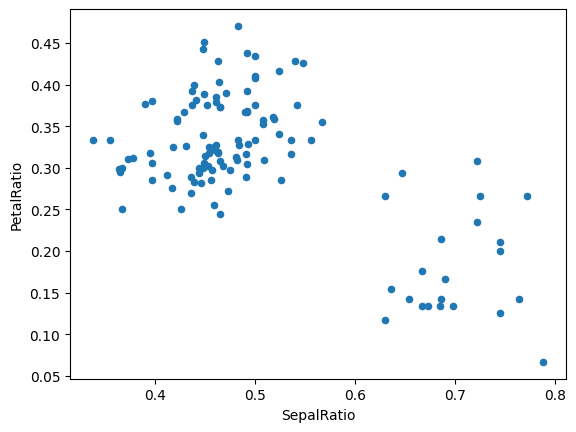

In [24]:
#2️⃣ El poder del encadenamiento (methodd chaining): filtra datos y luego calcular cuna columna sobre esos datos filtrados
resultado = (
    iris
    #2.1. Primero filtramos los valores de la columna SepalLength mayores a 5
    .query("sepal_length > 5") 
    #2.2. Luego, calculamos columnas nuevas BASADAS en el DataFrame ya filtrado
    .assign(
        #La "x" dentro del  lambda no es el DF iris orignal completo,  si no e subconjunto de datos que pasó el filtro de query
        SepalRatio = lambda x: x.sepal_width / x.sepal_length,
        PetalRatio = lambda x: x.petal_width / x.petal_length
    )
    .plot(kind = "scatter", x = "SepalRatio", y="PetalRatio")
)

In [29]:
#Serie de listas
serie = {
    "Columna_A": [1, 2, 3],
    "Columna_B": [4, 5, 6]    
}

dfa = pd.DataFrame(serie)
print(f'DataFrame original:\n{dfa}')
print('=' * 50)
dfa_nuevo = dfa.assign(Columna_C = lambda x: x["Columna_A"] + x["Columna_B"], Columna_D = lambda x: x["Columna_A"] + x["Columna_C"])
print(f'DataFrame nuevo:\n{dfa_nuevo}')

DataFrame original:
   Columna_A  Columna_B
0          1          4
1          2          5
2          3          6
DataFrame nuevo:
   Columna_A  Columna_B  Columna_C  Columna_D
0          1          4          5          6
1          2          5          7          9
2          3          6          9         12


### 2.10.🧩Indexación y selección básica

In [34]:
data = {
    'one': [1.0, 2.0, 3.0, 4.0],
    'bar': [1.0, 2.0, 3.0, 4.0],
    'flag': [False, False, True, False],
    'foo': ["bar", "bar", "bar", "bar"]
}

df = pd.DataFrame(data, index = ["fila_A", "fila_B", "fila_C", "fila_D"])
print(f'✨DataFrame base:\n{df}')

✨DataFrame base:
        one  bar   flag  foo
fila_A  1.0  1.0  False  bar
fila_B  2.0  2.0  False  bar
fila_C  3.0  3.0   True  bar
fila_D  4.0  4.0  False  bar


In [44]:
#1️⃣Seleccionar una columna por su nombre (string): df[etiqueta de columna]
columna_one = df["one"]
print(f'Seleccionamos la columna "one":\n{columna_one}')
print('=' * 40)
print(f'Tipo:\n{ type(columna_one) }')

Seleccionamos la columna "one":
fila_A    1.0
fila_B    2.0
fila_C    3.0
fila_D    4.0
Name: one, dtype: float64
Tipo:
<class 'pandas.core.series.Series'>


In [45]:
#2️⃣Selección de fila por etiqueta: df.loc[etiqueta de fila]
fila_B = df.loc["fila_B"]
print(type(fila_B))
print('=' * 50)
print(f'Fila B:\n{fila_B}')

<class 'pandas.core.series.Series'>
Fila B:
one       2.0
bar       2.0
flag    False
foo       bar
Name: fila_B, dtype: object


In [48]:
#3️⃣Selección de fila por posición entera: df.iloc[ubicación]
fila_pos_0 = df.iloc[2]
print(type(fila_pos_0))
print('=' * 40)
print(f'Fila de la posición 0:\n{fila_pos_0}')

<class 'pandas.core.series.Series'>
Fila de la posición 0:
one      3.0
bar      3.0
flag    True
foo      bar
Name: fila_C, dtype: object


In [54]:
#4️⃣Slicing de filas
slice_filas = df[1:3]
print(type(slice_filas))
print('=' * 50)
print(f'Desde la primera fila hasta la tercera:\n{slice_filas}')

<class 'pandas.core.frame.DataFrame'>
Desde la primera fila hasta la tercera:
        one  bar   flag  foo
fila_B  2.0  2.0  False  bar
fila_C  3.0  3.0   True  bar


In [59]:
#5️⃣Selección por vector booleano: df[bool_vector]. Devuelve un Dataframe
df_seleccion_bool = df[ df["one"] * df["bar"] > 5]
print(f'DataFrame filtrado por condición booleana:\n{df_seleccion_bool}')

DataFrame filtrado por condición booleana:
        one  bar   flag  foo
fila_C  3.0  3.0   True  bar
fila_D  4.0  4.0  False  bar


### 🧮2.11. Alineación de datos y artimética

#### 2.11.1 Alineación automática
Cuando se realiza operaciones matemáticas entre dos DataFrames, pandas ___alinea automáticamente___ los datos basándose en ___ambas etiquetas___: filas (índíce) y columnas.

In [81]:
# 📦 DataFrame 1 (4 filas, 3 columnas A-C)
df1 = pd.DataFrame(np.arange(12).reshape(4, 3), columns=["A", "B", "C"])
# 📦 DataFrame 2 (3 filas, 3 columnas B-D)
df2 = pd.DataFrame(np.arange(9).reshape(3, 3), columns=["B", "C", "D"])

print("🟦DataFrame 1:\n", df1)
print('=' * 20)
print("\n🟧DataFrame 2:\n", df2)

#➕Suma con alineación automática
#Columnas B y C coinciden; las columnas A (solo en df1) y D (solo en df2) resultarán en NaN donde no haya pareja
df_resultado_suma = df1 + df2
print('=' * 45)
print(f'DataFrmae resultante de la suma de df1 y df2:\n{df_resultado_suma}')

🟦DataFrame 1:
    A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

🟧DataFrame 2:
    B  C  D
0  0  1  2
1  3  4  5
2  6  7  8
DataFrmae resultante de la suma de df1 y df2:
    A     B     C   D
0 NaN   1.0   3.0 NaN
1 NaN   7.0   9.0 NaN
2 NaN  13.0  15.0 NaN
3 NaN   NaN   NaN NaN


#### 2.11.2. Operaciones entre DataFrame y Series (Broadcasting)
El comportamiento por defecto al operar un DataFrame con una Series es alinear el índice de las eries con las columnas del DataFrame. Esto se conoce como briadcasting por filas (se aplica operación fila por fila).

In [86]:
#Seleccionamos la primera fila de df1 como una Series
serie_fila_0 = df1.iloc[0]

print(f'Dataframe df1:\n{df1}')
print('=' * 40)
print(type(serie_fila_0))
print('=' * 40)
print(f'Fila 0:\n{serie_fila_0}')
print('=' * 25)
print('Restamos la serie del DF:')
df_resta_df_serie = df1-serie_fila_0
print(df_resta_df_serie)

Dataframe df1:
   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
<class 'pandas.core.series.Series'>
Fila 0:
A    0
B    1
C    2
Name: 0, dtype: int64
Restamos la serie del DF:
   A  B  C
0  0  0  0
1  3  3  3
2  6  6  6
3  9  9  9


#### 🧮2.11.3. Operaciones con escalares
Las operaciones con número sueltos (escalares) se aplican elemento por elemento a todo el dataFrame. Similar al algebra lineal.

In [88]:
print(f'DataFrame 1:\n{df1}')
print('=' * 40)

df_mate = df1 * 5  + 2
print(f'Resultado de df1 * 5  + 2:\n{df_mate}')
print('=' * 40)

df_inv = 1 / (df1 + 1) #Sumamos 1 para evitar la división por cero
print(f'Resultado de 1 / (df1 + 1):\n{df_inv}')

DataFrame 1:
   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
Resultado de df1 * 5  + 2:
    A   B   C
0   2   7  12
1  17  22  27
2  32  37  42
3  47  52  57
Resultado de 1 / (df1 + 1):
          A         B         C
0  1.000000  0.500000  0.333333
1  0.250000  0.200000  0.166667
2  0.142857  0.125000  0.111111
3  0.100000  0.090909  0.083333


#### 2.11.4. Operaciones booleanas
Se aplican los operadores lógicos bitwise. Esto operadores funcionan elemento por elemento.

In [64]:
#🏗️ Creación de DataFrames booleanos
df_bool_1 = pd.DataFrame({"a": [True, False], "b": [False, True]})
df_bool_2 = pd.DataFrame({"a": [False, False], "b": [True, True]})
print("🧠 DF Booleano 1:\n", df_bool_1)
print('=' * 20)
print("🧠 DF Booleano 2:\n", df_bool_2)

🧠 DF Booleano 1:
        a      b
0   True  False
1  False   True
🧠 DF Booleano 2:
        a     b
0  False  True
1  False  True


In [66]:
#Operador AND (&)
print(f'Resultado de AND(df1 & df2):')
df_and = df_bool_1 & df_bool_2
print(df_and)

Resultado de AND(df1 & df2):
       a      b
0  False  False
1  False   True


In [67]:
#Operador OR (&)
print(f'Resultado de OR(df1 | df2):')
df_or = df_bool_1 | df_bool_2
print(df_or)

Resultado de OR(df1 | df2):
       a     b
0   True  True
1  False  True


In [72]:
#⛔Negación (-) o (~)
df_negacion_1 = -df_bool_1
df_negacion_2 = ~df_bool_2 
print(f'DataFrame negado 1 (-df_bool_1):\n{df_negacion_1}')
print('=' * 35)
print(f'DataFrame negado 2 (~df_bool_2):\n{df_negacion_2}')

DataFrame negado 1 (-df_bool_1):
       a      b
0  False   True
1   True  False
DataFrame negado 2 (~df_bool_2):
      a      b
0  True  False
1  True  False


### 2.12. Transposición de DataFrames
Para intercambiar filas por columnas(rotar el DataFrame), como en las matrices de álgebra lineal

In [97]:
#Transposición
print('=' * 50)
print("🟦Dataframe original (4 filas x 3 columnas):")
print(df1)
print('=' * 50)
df1_traspuesta = df1.T
print(f'Transpuesta (3 filas x 4 columnas):\n{df1_traspuesta}')
print('=' * 50)

🟦Dataframe original (4 filas x 3 columnas):
   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
Transpuesta (3 filas x 4 columnas):
   0  1  2   3
A  0  3  6   9
B  1  4  7  10
C  2  5  8  11


### 2.13. Intepolabilidad de DataFrame con Función NumPy
La integración de _Pandas_ con _Numpy_ es profunda, dado que la mayoría de funciones NumPy pueden llamaarse directamente sobre objetos Series o DataFrame.

#### 🧮2.13.1. Aplicación de funciones universales (ufuncs)
Las funciones universales de NumPy (ufuncs) se aplican elemento por elementos a los DataFrames, mantemiendo intacta de estructura.

In [102]:
# Preparación de DataFrame de ejemplo
np.random.seed(42)
df_ejemplo = pd.DataFrame(np.random.randn(5, 4), columns=["A", "B", "C", "D"])
print("📊 DataFrame Original (5x4):")
print(df_ejemplo)
#🚀Aplicamos la función exponenciad de Numpy np.exp() directamente al dataFrame
df_ejemplo_exp = np.exp(df_ejemplo)
print('=' * 45)
print(f'Resultado:\n{df_ejemplo_exp}')


📊 DataFrame Original (5x4):
          A         B         C         D
0  0.496714 -0.138264  0.647689  1.523030
1 -0.234153 -0.234137  1.579213  0.767435
2 -0.469474  0.542560 -0.463418 -0.465730
3  0.241962 -1.913280 -1.724918 -0.562288
4 -1.012831  0.314247 -0.908024 -1.412304
Resultado:
          A         B         C         D
0  1.643313  0.870868  1.911118  4.586099
1  0.791240  0.791253  4.851136  2.154233
2  0.625331  1.720406  0.629130  0.627677
3  1.273746  0.147595  0.178188  0.569904
4  0.363189  1.369228  0.403320  0.243581


#### 🧱2.13.2. Conversión a Array de NumPy

In [104]:
array_puro = np.asarray(df_ejemplo)
print(f'Tipo de objeto resultante:\n{ type(array_puro) }')
print('=' * 50)
print(f'Array puro, sin etiquetas:\n{ array_puro }')

Tipo de objeto resultante:
<class 'numpy.ndarray'>
Array puro, sin etiquetas:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]]


#### 🧩2.13.3. Alineación en funciones con multiples Series
cuando se pasa __más de una Serie__ a un función ```ufunc``` de NumPy, pandas realiza la alineación automática por etiqueta antes de ejecutar la operación.

In [122]:
#A. Alineación por etiquetas desordenadas
# 📦 Series con el mismo índice, pero desordenado
ser1 = pd.Series([34, 20, 10], index=["a", "b", "c"])
ser2 = pd.Series([3, 5, 2], index=["b", "a", "c"]) # 'a' y 'b' están cambiados

print(f'📋 Series 1:\n{ser1}' )
print('=' * 35)
print(f'📋 Series 2 (Desordenada):\n{ser2}')
print('=' * 35)
# Se realiza un alineado por etiqueta
residuo_alineado = np.remainder(ser1, ser2)
print(f'Resultado de np.remainder():\n{ residuo_alineado }')


📋 Series 1:
a    34
b    20
c    10
dtype: int64
📋 Series 2 (Desordenada):
b    3
a    5
c    2
dtype: int64
Resultado de np.remainder():
a    4
b    2
c    0
dtype: int64


In [127]:
#B. Manejo de Nan y unión de índices
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
print(f'Serie 1:\n{ ser1 }')
print('=' * 20)
print(f'Serie 2:\n{ser2}')
print('=' * 40)
residuos_nan = np.remainder(ser1, ser3)
print(f'Resultado de np.remainder(ser1, ser3):\n{ residuos_nan }')

Serie 1:
a    34
b    20
c    10
dtype: int64
Serie 2:
b    3
a    5
c    2
dtype: int64
Resultado de np.remainder(ser1, ser3):
a    NaN
b    0.0
c    2.0
d    NaN
dtype: float64


#### ⚖️2.13.4. Prioridad: Serie vs Index

In [133]:
# No hay alineación por etiquetas , los compara por posiicones
s_valores = pd.Series([1, 2, 3])
idx_valores = pd.Index([4, 5, 0])
print(f'Serie:\n{s_valores}')
print('=' * 30)
print(f'Index:\n{idx_valores}')
print('=' * 60)
#np.maximum compara elemento a elemento y devuelve el mayor entre de los dos
maximos = np.maximum(s_valores, idx_valores)
print(f'✨Resultado de np.maximums(s_valores, idx_valores):\n{maximos}')
print('=' * 60)
print( type(maximos) )

Serie:
0    1
1    2
2    3
dtype: int64
Index:
Index([4, 5, 0], dtype='int64')
✨Resultado de np.maximums(s_valores, idx_valores):
0    4
1    5
2    3
dtype: int64
<class 'pandas.core.series.Series'>


## 🖥️2.14. Pantalla de la consola
Cuando se imprime un DataFrame en la consola, pandaslo trunca (corta) automáticalemnete par aque quepa en al pantalla y sea legible. También podemos obtener un resumen con ```info()```.

In [138]:
data_sim = np.random.randint(0, 100, size=(100, 23))
column_names = [f'col_{i}' for i in range(23)]

df_largo = pd.DataFrame(data_sim, columns=column_names)

print("📐DataFrame largo (pandas lo trunca automáticamente):")
print(df_largo)

📐DataFrame largo (pandas lo trunca automáticamente):
    col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0      64     50     42     85     22     55     18     81     75     54  ...   
1      98     39     79     37     76     86     53     21     15     27  ...   
2      22     63     86     42     22     95     29     76     17     86  ...   
3      41      6     49     47     83     90      5     90      8     56  ...   
4      65     24     57     40      5     74     37      5     44     74  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     66     12      2     25     56     23     52     69     42     59  ...   
96     45     43     21     52     58     93     29      7     97     56  ...   
97     25     26     61     82     49     41     28     38     59     40  ...   
98     68     48     25      4     21     78     12     27     32     22  ...   
99      5     45     49     37     87     17     26     

In [139]:
print("\n💡 1. Usando .info() para un resumen estructurado:")
df_largo.info()


💡 1. Usando .info() para un resumen estructurado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col_0   100 non-null    int32
 1   col_1   100 non-null    int32
 2   col_2   100 non-null    int32
 3   col_3   100 non-null    int32
 4   col_4   100 non-null    int32
 5   col_5   100 non-null    int32
 6   col_6   100 non-null    int32
 7   col_7   100 non-null    int32
 8   col_8   100 non-null    int32
 9   col_9   100 non-null    int32
 10  col_10  100 non-null    int32
 11  col_11  100 non-null    int32
 12  col_12  100 non-null    int32
 13  col_13  100 non-null    int32
 14  col_14  100 non-null    int32
 15  col_15  100 non-null    int32
 16  col_16  100 non-null    int32
 17  col_17  100 non-null    int32
 18  col_18  100 non-null    int32
 19  col_19  100 non-null    int32
 20  col_20  100 non-null    int32
 21  col_21  100 non-null    int32
 22  

In [141]:
# Mostrar el dataFrame completo con el método: df.to_string()
print(df_largo.to_string())

    col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  col_10  col_11  col_12  col_13  col_14  col_15  col_16  col_17  col_18  col_19  col_20  col_21  col_22
0      64     50     42     85     22     55     18     81     75     54      91      91      59      58      32      18      27      51      48      36      25      98      97
1      98     39     79     37     76     86     53     21     15     27      34      59      44      45      71      54      85      84      25      84      24      64       5
2      22     63     86     42     22     95     29     76     17     86      78      96      20      56      22      90      44      43      81      87      46      39      50
3      41      6     49     47     83     90      5     90      8     56      30      20      89      39      44      76      48      86      19      91      16      27      40
4      65     24     57     40      5     74     37      5     44     74      13      65      39       2      98   

In [4]:
#Control de opciones de visualización
# A. Ancho de visualización
# ⚙️Reducimos el ancho de visualización (por defecto suele ser 80)
pd.set_option("display.width", 40) 

df_ancho = pd.DataFrame(np.random.randn(3, 10))

print("\n↔️ 3.1 DataFrame impreso con ancho de consola reducido (40):")
print(df_ancho)
# Verás que se necesitan más filas para mostrar las 10 columnas.

# 💡 Consejo: Siempre restablece a un valor alto para el trabajo normal.
pd.set_option("display.width", 80)


↔️ 3.1 DataFrame impreso con ancho de consola reducido (40):
          0         1         2         3         4         5         6         7         8         9
0  1.999004  0.031033  0.764260  0.009560 -1.338161  1.296056 -0.504513  0.235699  0.417452  0.969075
1 -0.197870 -0.156802 -0.038414  1.232997 -0.645566 -0.150290 -0.164361 -0.710412  0.127361  0.262405
2  0.750963 -1.162806  0.346181 -0.134333  0.140488  0.759630 -1.543801  0.178652  0.089071  0.003378


In [10]:
#B. Ancho máximo de columna (display.max_colwidth), limitar en número de caracteres
# Controla cuántos caracteres se muestran en una columna individual 
# antes de que el texto se trunque con ... Es crucial para columnas con strings largos (como paths o URLs).
# 📝 Datos con paths largos
datos_paths = {
    "nombre": ["file_01", "file_02"],
    "ruta_completa": [
        "media/user/almacenamiento/carpeta_larga_de_archivos_clave_01/file_01.txt",
        "media/user/almacenamiento/carpeta_larga_de_archivos_clave_02/file_02.txt",
    ],
}
df_paths = pd.DataFrame(datos_paths)

# 📏 Opción A: Truncamiento bajo (solo se ven los primeros 30 caracteres)
pd.set_option("display.max_colwidth", 30)
print("\n📏 Ancho de Columna = 30 (Truncado):")
print(df_paths)

print('=' * 100)
# 📏 Opción B: Mostrar más caracteres (100)
pd.set_option("display.max_colwidth", 80)
print("\n📏 Ancho de Columna = 100 (Completo):")
print(df_paths)


📏 Ancho de Columna = 30 (Truncado):
    nombre                  ruta_completa
0  file_01  media/user/almacenamiento/...
1  file_02  media/user/almacenamiento/...

📏 Ancho de Columna = 100 (Completo):
    nombre  \
0  file_01   
1  file_02   

                                                              ruta_completa  
0  media/user/almacenamiento/carpeta_larga_de_archivos_clave_01/file_01.txt  
1  media/user/almacenamiento/carpeta_larga_de_archivos_clave_02/file_02.txt  


In [11]:
#C. Deshabilitar Salto de Línea (expand_frame_repr) 🚫
#Por defecto, los DataFrames anchos se imprimen en varias filas. 
# Al establecer esta opción en False, se fuerza a imprimir en un solo bloque horizontal, lo que puede requerir desplazamiento.
# 🚫 Deshabilitar el salto de línea (imprime el DataFrame en una sola "tira" horizontal)
pd.set_option("display.expand_frame_repr", False)
print("🚫 DataFrame ancho en una sola línea (requiere scroll horizontal):")
print(df_ancho) 

print('=' * 110)

# 💡 Restablecer a True (comportamiento normal)
pd.set_option("display.expand_frame_repr", True)
print('DataFrame ancho en múltiples lineas')
print(df_ancho)

🚫 DataFrame ancho en una sola línea (requiere scroll horizontal):
          0         1         2         3         4         5         6         7         8         9
0  1.999004  0.031033  0.764260  0.009560 -1.338161  1.296056 -0.504513  0.235699  0.417452  0.969075
1 -0.197870 -0.156802 -0.038414  1.232997 -0.645566 -0.150290 -0.164361 -0.710412  0.127361  0.262405
2  0.750963 -1.162806  0.346181 -0.134333  0.140488  0.759630 -1.543801  0.178652  0.089071  0.003378
DataFrame ancho en múltiples lineas
          0         1         2         3         4         5         6  \
0  1.999004  0.031033  0.764260  0.009560 -1.338161  1.296056 -0.504513   
1 -0.197870 -0.156802 -0.038414  1.232997 -0.645566 -0.150290 -0.164361   
2  0.750963 -1.162806  0.346181 -0.134333  0.140488  0.759630 -1.543801   

          7         8         9  
0  0.235699  0.417452  0.969075  
1 -0.710412  0.127361  0.262405  
2  0.178652  0.089071  0.003378  


### 2.15. 🎯Acceso a tributos de columna DataFrame y finalización de IPython
#### 2.15.1. Acceso por Atributo (Dot Notation) 🎯
Si la etiqueta de una columna es un nombre de variable Python válido (no contiene espacios, ni empieza con números, etc.), puedes acceder a esa columna utilizando la sintaxis de punto (.), como si fuera un atributo directo del DataFrame.

In [12]:
df = pd.DataFrame({
    "foo1": np.random.randn(5),
    "foo2": np.random.randn(5),
    "edad_media": np.arange(5) 
})

print("✨ DataFrame de Ejemplo:")
print(df)

print('=' * 40)
# 🎯 Acceso usando el punto (df.foo1)
columna_atributo = df.foo1
print(f'Columna:\n{columna_atributo}',)

✨ DataFrame de Ejemplo:
       foo1      foo2  edad_media
0  0.438532 -1.527011           0
1  0.313841  1.011261           1
2 -0.267648 -0.307109           2
3  0.449060  2.573045           3
4  0.577817  0.170505           4
Columna:
0    0.438532
1    0.313841
2   -0.267648
3    0.449060
4    0.577817
Name: foo1, dtype: float64


💡 __NOTA:__ Aunque el acceso por atributo es conveniente, SIEMPRE es más seguro y recomendado usar la __notación de corchetes (df['foo1'])__, especialmente si el nombre de la columna pudiera entrar en conflicto con un método del DataFrame por ejemplo df.sum .

#### 2.15.2. Autocompletado de IPython ⌨️
Una gran ventaja en __entornos interactivos__ (como Jupyter Notebooks o IPython) es que pandas conecta las etiquetas de columna al __mecanismo de autocompletado por tabulación__. Es simplemente dar un TAB y se completa automaticamente lo que hemos seleccionado.

In [13]:
# 1. 🛠️ Creación del DF
df_proyectos = pd.DataFrame({
    "presupuesto_total": np.random.randint(1000, 5000, 5),
    "fecha_inicio": pd.to_datetime(['2024-01-15', '2024-03-01', '2024-05-20', '2024-07-10', '2024-09-01']),
    "estado_actual": ["Activo", "Pausado", "Activo", "Finalizado", "Activo"]
})

print("✨ DataFrame de Proyectos:")
display(df_proyectos)

✨ DataFrame de Proyectos:


,presupuesto_total,fecha_inicio,estado_actual
0,1055,2024-01-15,Activo
1,4530,2024-03-01,Pausado
2,2121,2024-05-20,Activo
3,2585,2024-07-10,Finalizado
4,2918,2024-09-01,Activo


```display(df)```´es otra forma de presentar Series, dataFrames y elementos de Pandas de una mera visual más atractura si trabajamos el entornos interactivos como Jupyter.